import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filename = 'trainable_last_large_beta'
image_title = '$\\|\\beta\\|_2^2$: 16, Trainable: last layer'
plotly_title = r'$\|\beta\|_2^2$: 16, Trainable: last layer'
exp = 'summary/' + filename + '.txt'
with open(exp) as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = []
for d in out:
    try:
        f = eval(d)
        dict_list.append(f)
    except:
        continue

#dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)
#df['lipton-excess'] = (df['lipton'] - df['bayes_error']).astype('float32') 
#df['oracle-excess'] = (df['oracle'] - df['bayes_error']).astype('float32') 
df.dtypes

measure = ['train-mse', 'majority-mse', 'minority-mse']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std', 'count']
result = df.groupby(['nodes', 'epochs'], as_index=False).agg(agg_dict)
result

epochs_list = np.unique(df['epochs'])
color_list = 'bgrcyk'

fig, ax = plt.subplots(1, 3, figsize = (18, 5), sharex=True)
for epochs, color in zip(epochs_list, color_list):
    result1 = result.loc[result['epochs']==epochs]
    nodes, mean, std, count = result1['nodes'], result1['minority-mse']['mean'], result1['minority-mse']['std'],\
     result1['minority-mse']['count']
    ax[0].plot(nodes, mean, color)
    ax[0].errorbar(nodes, mean, std)
    ax[0].set_yscale('log')
    ax[0].set_xscale('log')
    ax[0].set_title('Test MSE (Minority)')
    ax[0].set_xlabel('nodes')


    mean, std, count = result1['majority-mse']['mean'], result1['majority-mse']['std'], result1['majority-mse']['count']
    ax[1].plot(nodes, mean, color)
    ax[1].errorbar(nodes, mean, std)
    ax[1].set_yscale('log')
    ax[1].set_xscale('log')
    ax[1].set_title('Test MSE (Majority)')
    ax[1].set_xlabel('nodes')

    mean, std, count = result1['train-mse']['mean'], result1['train-mse']['std'], result1['train-mse']['count']
    ax[2].plot(nodes, mean, color)
    ax[2].errorbar(nodes, mean, std)
    ax[2].set_yscale('log')
    ax[2].set_xscale('log')
    ax[2].set_title('Train MSE (Overall)')
    ax[2].set_xlabel('nodes')

fig.suptitle(image_title)
plt.legend(epochs_list, title='epochs')
plt.savefig('pdf_plots/' + filename + '.pdf')

epochs_list = np.unique(df['epochs'])
color_list=['red', 'green', 'blue', 'black', 'purple', 'orange']

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly
fig = make_subplots(rows = 1, cols=3, subplot_titles=['Test MSE (minority)', 'Test MSE (majority)', 'Train MSE (overall)'])
for epochs, color in zip(epochs_list, color_list):
    line = go.scatter.Line(color = color)
    result1 = result.loc[result['epochs']==epochs]
    nodes, mean, std, count = result1['nodes'], result1['minority-mse']['mean'], result1['minority-mse']['std'],\
     result1['minority-mse']['count']
    error_y = dict(type = 'data', array = std, color = color, width = 0, thickness = 0.9)
    marker = dict(size = 3)
    fig.append_trace(go.Scatter(x = nodes, y = mean, line = line, error_y = error_y, marker = marker, name = str(epochs),\
         legendgroup = str(epochs), showlegend = False), row = 1, col = 1)

    mean, std, count = result1['majority-mse']['mean'], result1['majority-mse']['std'], result1['majority-mse']['count']
    error_y['array'] = std
    fig.append_trace(go.Scatter(x = nodes, y = mean, line = line,  error_y = error_y, marker = marker, name = str(epochs),\
        legendgroup = str(epochs), showlegend = False), row = 1, col = 2)

    mean, std, count = result1['train-mse']['mean'], result1['train-mse']['std'], result1['train-mse']['count']
    error_y['array'] = std
    fig.append_trace(go.Scatter(x = nodes, y = mean, line = line, error_y = error_y, marker = marker,  name = str(epochs),\
        legendgroup = str(epochs), showlegend = True), row = 1, col = 3)


fig.update_xaxes(type = 'log', title = 'nodes')
fig.update_layout(height = 400, width = 1000, legend_title_text='epochs', title = plotly_title)

fig.show()
plotly.offline.plot(fig, filename = 'html_plots/' + filename + '.html')

In [31]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
with open('summary/mse_activation.txt', 'r') as f:
    out = f.read()
out = re.split(r'\n', out)
dict_list = []
for d in out:
    try:
        f = eval(d)
        dict_list.append(f)
    except:
        continue



df = pd.DataFrame(dict_list)
df.dtypes
#df1 = df.loc[df['epochs'] == 5000]

nodes              int64
SNR              float64
train-mse        float64
train-mse-bal    float64
majority-mse     float64
minority-mse     float64
trainable         object
setup             object
dtype: object

In [32]:
measure = ['train-mse', 'majority-mse', 'minority-mse']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std', 'count']
result = df.groupby(['setup', 'SNR',  'nodes'], as_index=False).agg(agg_dict)
result.loc[result['setup']=='diff-core']

setup     SNR nodes     train-mse                     majority-mse  \
                                     mean           std count         mean   
0   diff-core    0.01   224  2.819897e-25  1.728594e-25   500  8151.814399   
1   diff-core    0.01   325  4.790689e-26  3.870419e-26   500  2127.280729   
2   diff-core    0.01   471  3.509789e-26  2.373380e-26   500  1340.295828   
3   diff-core    0.01   683  2.826105e-26  2.491797e-26   500  1006.254585   
4   diff-core    0.01   990  2.269569e-26  1.586173e-26   500   858.857002   
5   diff-core    0.01  1434  2.459277e-26  6.956205e-26   500   757.364271   
6   diff-core    0.01  2078  2.068742e-26  1.577192e-26   500   698.338639   
7   diff-core    0.01  3012  2.065126e-26  2.493004e-26   500   661.581674   
8   diff-core    0.01  4364  2.008896e-26  2.025625e-26   500   638.125031   
9   diff-core    0.01  6325  1.994630e-26  2.578628e-26   500   622.845466   
10  diff-core    0.10   224  2.887971e-27  1.755791e-27  1500    82.067459   
11  diff-core    0.10   325  5.330332e-28  2.863747e-28  1500    21.177103   
12  diff-core    0.10   471  4.027638e-28  2.509574e-28  1500    13.202352   
13  diff-core    0.10   683  3.428696e-28  2.306059e-28  1500    10.060904   
14  diff-core    0.10   990  3.095001e-28  2.384635e-28  1500     8.536624   
15  diff-core    0.10  1434  2.774372e-28  2.018836e-28  1500     7.551831   
16  diff-core    0.10  2078  2.629482e-28  2.046815e-28  1500     6.990824   
17  diff-core    0.10  3012  2.909577e-28  2.531786e-28  1500     6.630650   
18  diff-core    0.10  4364  2.871335e-28  4.907883e-28  1500     6.386445   
19  diff-core    0.10  6325  2.643483e-28  4.034871e-28  1500     6.227049   
20  diff-core    1.00   224  8.387388e-29  8.411867e-29  1500     0.978985   
21  diff-core    1.00   325  8.608474e-29  1.327319e-28  1500     0.257643   
22  diff-core    1.00   471  7.479446e-29  1.184970e-28  1500     0.163095   
23  diff-core    1.00   683  8.519073e-29  1.435323e-28  1500     0.124433   
24  diff-core    1.00   990  7.378641e-29  1.194116e-28  1500     0.107191   
25  diff-core    1.00  1434  7.536276e-29  1.260522e-28  1500     0.095432   
26  diff-core    1.00  2078  7.359671e-29  1.194455e-28  1500     0.088777   
27  diff-core    1.00  3012  1.195871e-28  2.010869e-28  1500     0.084304   
28  diff-core    1.00  4364  8.774209e-29  1.456387e-28  1500     0.081431   
29  diff-core    1.00  6325  7.436698e-29  1.331631e-28  1500     0.079777   
30  diff-core   10.00   224  5.683839e-29  8.191350e-29  1500     0.171470   
31  diff-core   10.00   325  7.553142e-29  1.208463e-28  1500     0.049448   
32  diff-core   10.00   471  7.204582e-29  1.186466e-28  1500     0.033036   
33  diff-core   10.00   683  7.853636e-29  1.264716e-28  1500     0.026300   
34  diff-core   10.00   990  7.556133e-29  1.234345e-28  1500     0.023340   
35  diff-core   10.00  1434  7.454376e-29  1.253384e-28  1500     0.021404   
36  diff-core   10.00  2078  7.151981e-29  1.263206e-28  1500     0.020195   
37  diff-core   10.00  3012  1.104667e-28  1.878479e-28  1500     0.019423   
38  diff-core   10.00  4364  8.489892e-29  1.561997e-28  1500     0.018904   
39  diff-core   10.00  6325  7.174523e-29  1.143361e-28  1500     0.018657   
40  diff-core  100.00   224  7.086067e-29  9.642884e-29  1000     0.175801   
41  diff-core  100.00   325  9.848110e-29  1.372204e-28  1000     0.049159   
42  diff-core  100.00   471  8.863910e-29  1.342342e-28  1000     0.032553   
43  diff-core  100.00   683  9.908763e-29  1.483862e-28  1000     0.025656   
44  diff-core  100.00   990  9.408068e-29  1.611142e-28  1000     0.022742   
45  diff-core  100.00  1434  9.513780e-29  1.594901e-28  1000     0.020747   
46  diff-core  100.00  2078  8.645785e-29  1.364521e-28  1000     0.019487   
47  diff-core  100.00  3012  1.310861e-28  2.152213e-28  1000     0.018738   
48  diff-core  100.00  4364  1.140363e-28  1.893202e-28  1000     0.018221   
49  diff-core  100.00  6325  9

fig, ax = plt.subplots(1, 3, figsize = (18, 5), sharex=True)
betas = [1, 5, 10]
for i, beta in enumerate(betas):
    result1 = result.loc[result['beta-norm']==beta]
    nodes, mean_minor, std_minor = result1['nodes'],\
         result1['minority-mse']['mean'], result1['minority-mse']['std']

    mean_major, std_major = result1['majority-mse']['mean'], result1['majority-mse']['std']
    mean_tr, std_tr = result1['train-mse']['mean'], result1['train-mse']['std']
    
    ax[i].errorbar(nodes, mean_minor, std_minor, color = 'k', linestyle = '-', marker = '*')
    ax[i].errorbar(nodes, mean_major, std_major, color = 'orange', linestyle = '-', marker = '+')
    ax[i].errorbar(nodes, mean_tr, std_tr, color = 'g', linestyle = '-', marker = 'x')
    #ax[0].set_yscale('log')
    ax[i].set_xscale('log')
    ax[i].title.set_text(f'SNR={beta**2}')
lines = [Line2D([0], [0], color='k', linestyle='-', marker='*'), \
    Line2D([0], [0], color='orange', linestyle='-', marker='+'), \
        Line2D([0], [0], color='g', linestyle='-', marker='x')]  

plt.legend(lines, ['Minority', 'Majority', 'Balanced Train'], title='MSE')
#plt.title('$\\text{SNR}=\\frac{\\|\\beta\\|_2^2}{\\|\\delta\\|_2^2}$')
plt.savefig('pdf_plots/plot.pdf')

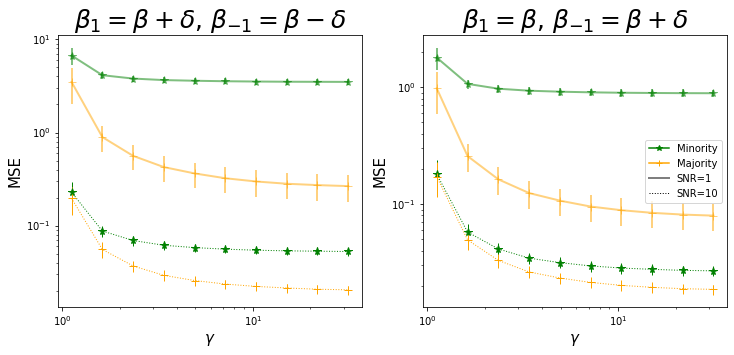

In [33]:
SNRs = [1, 10]
ltys = ['-', ':']
lws = [2, 1]
alphas = [0.5, 1]
add_on = 4 ** np.array(range(6))
#setups = ['same-core-over-envs', 'different-core-over-envs']
setups = ['same-core', 'diff-core']
names = ['$\\beta_{1} = \\beta + \\delta$, $\\beta_{-1} = \\beta - \\delta$',\
     '$\\beta_{1} = \\beta$, $\\beta_{-1} = \\beta + \\delta$']
fig, ax = plt.subplots(1, 2, figsize = (12, 5), sharex=True)
for s, (setup, name) in enumerate(zip(setups, names)):
    result_setup = result.loc[result['setup']==setup]
    for i, (SNR, lty, lw, alpha) in enumerate(zip(SNRs, ltys, lws, alphas)):
        result1 = result_setup.loc[result['SNR']==SNR]
        nodes, mean_minor, std_minor = result1['nodes'],\
            result1['minority-mse']['mean'], result1['minority-mse']['std']

        mean_major, std_major = result1['majority-mse']['mean'], result1['majority-mse']['std']
        mean_tr, std_tr = result1['train-mse']['mean'], result1['train-mse']['std']
    
        ax[s].errorbar(nodes/200, mean_minor, std_minor, color = 'g', linestyle = lty,\
             marker = '*', markersize = 8, lw = lw, alpha = alpha)
        ax[s].errorbar(nodes * (1)/200, mean_major, std_major, color = 'orange', linestyle = lty,\
         marker = '+', markersize = 8, lw = lw, alpha = alpha)
        #ax[s].errorbar(nodes * (1.4), mean_tr, std_tr, color = 'g', linestyle = lty, marker = 'x',\
         #markersize = 8, lw = lw, alpha = alpha)
        ax[s].set_yscale('log')
        ax[s].set_xscale('log')
        ax[s].set_xlabel('$\\gamma$', fontsize = 15)
        ax[s].set_ylabel('MSE', fontsize = 15)
        ax[s].set_title(name, fontsize = 25)
        #ax[s].set_ylim(0, 20)
        
    
lines = [Line2D([0], [0], color='g', linestyle='-', marker='*'), \
    Line2D([0], [0], color='orange', linestyle='-', marker='+')]#, \
        #Line2D([0], [0], color='g', linestyle='-', marker='x')\
        #]  
labels = ['Minority', 'Majority']#, 'Balanced Train']
for i, (SNR, lty, lw, alpha) in enumerate(zip(SNRs, ltys, lws, alphas)):
    lines.append(Line2D([0], [0], color='k', linestyle=lty, lw = lw, alpha = alpha))
    j = i-1
    labels.append(f'SNR={SNR}')
plt.legend(lines, labels, fontsize = 10)
plt.savefig('pdf_plots/plot.pdf')

import numpy as np
n, d = 200, 10
np.random.seed(1)
gammas = np.logspace(0.05, 1.5, num = 10)
nodes_list = np.rint(n * gammas).astype('int')


def sample_from_sphere(n, d):
    x = np.random.normal(size = (n, d))
    x = (x.T/np.linalg.norm(x, axis = 1)).T
    return x

for nodes in nodes_list:
    w = sample_from_sphere(d, nodes)
    np.save(f'weights/w_{d}_{nodes}.npy', w)

### Testing 

In [1]:
import numpy as np
n, p = 200, 0.9
n1, n2 = int(n * p), int(n * (1-p))
SNR = 10
sigma = 0.1

x1, x2 = np.random.normal(size = (n1, 10)), np.random.normal(size = (n2, 10))
beta, delta = np.array([1] * 5 + [0] * 5).reshape((-1,1)),\
     np.sqrt(1)*np.array([0] * 5 + [1]*5).reshape((-1,1))
beta, delta =  2 * beta / np.linalg.norm(beta), (1/SNR) * delta / np.linalg.norm(delta)
y1, y2 = x1 @ (beta + delta) + sigma * np.random.normal(size=(n1, 1)),\
     x2 @ (beta - delta) + sigma * np.random.normal(size = (n2, 1))
sample_weights = np.array([(1-p)] * n1 + [p] * n2)
train_data = np.vstack((x1, x2)), np.vstack((y1, y2)), sample_weights


x_test = np.random.normal(size = (1000, 10))
y_test = x_test @ (beta - delta) + sigma * np.random.normal(size = (1000, 1))
test_minority = x_test, y_test

x_test = np.random.normal(size = (1000, 10))
y_test = x_test @ (beta + delta) + sigma * np.random.normal(size = (1000, 1))
test_majority = x_test, y_test

In [2]:
def hidden_layer(x, w):
    z = x @ w
    z[z<0]=0
    return z

def predict(x, weights):
    w, beta = weights
    z = hidden_layer(x, w)
    return z @ beta

def evaluate(data, weights, sample_weight = []):
    x, y = data
    n, _ = x.shape
    if sample_weight == []:
        sample_weight = np.array([1]*n)
    sample_weight = sample_weight/np.sum(sample_weight)
    y_hat = predict(x, weights)
    error = (y - y_hat).reshape((-1,))
    return np.sum(error ** 2 * sample_weight)


In [3]:
nodes = 990
weighted = True
x, y, sample_weight = train_data
_, input_shape = x.shape
w = np.load(f'weights/w_{input_shape}_{nodes}.npy') #np.random.normal(size = (input_shape, nodes))
z = hidden_layer(x, w)



z_w = z * np.sqrt(sample_weight.reshape((-1, 1)))
y_w = y * np.sqrt(sample_weight.reshape((-1, 1)))
    
beta = np.linalg.lstsq(z_w, y_w)[0]
    

# Evaluate 
evaluate((x, y), weights = [w, beta]), evaluate((x, y), weights = [w, beta],\
     sample_weight = sample_weight), evaluate(test_majority, weights = [w, beta]),\
         evaluate(test_minority, weights = [w, beta])

(2.858500669885626e-28,
 2.7962584026496423e-28,
 0.027648606428491557,
 0.0668898970969043)